## How to read the GW whitened signals

Before running the notebook, you need to import the zip file containing the whitened signals, then unzip the file.

In [4]:
!unzip Gravity_Spy_Glitches_whitened_1.zip

Archive:  Gravity_Spy_Glitches_whitened_1.zip
replace content/sample_data/Gravity_Spy/qiOJvCXifs_whitened.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Install gwpy

In [5]:
!pip install gwpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import useful packages

In [6]:
import os
import h5py as h5
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from os import listdir
import numpy as np

Example of a single signal, print the attributes of the dataseries and plot it

In [7]:
fout=h5.File('/content/content/sample_data/Gravity_Spy/7lCxxijueA_whitened.h5','r') 
type_of_glitch=list(fout.keys())[0]
print(type_of_glitch)

Power_Line


<KeysViewHDF5 ['sample_rate', 't0']>
1129202018.10938
4096.0


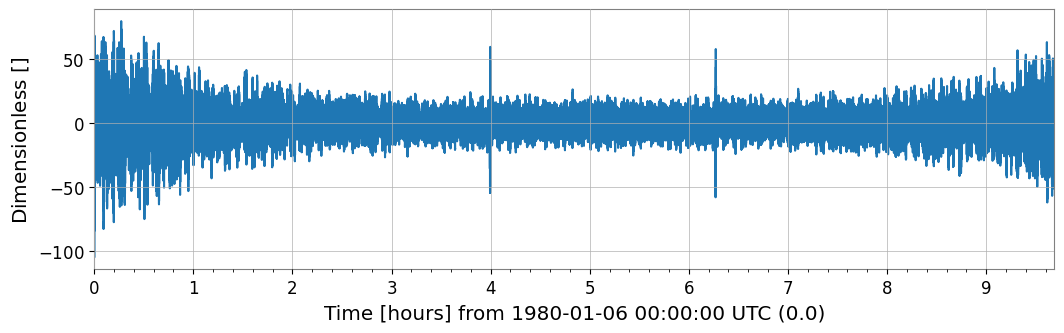

In [8]:
dataset=fout[type_of_glitch]
print(dataset.attrs.keys())
print(dataset.attrs['t0'])
print(dataset.attrs['sample_rate'])
t = TimeSeries(dataset[()])
t.plot()
plt.show()

Plot the Q-transform of the signal

In [10]:
def qplot(data, t_center, t_delta):
     
    plot=data.crop(t_center-t_delta, t_center+t_delta).plot(figsize=[2, 2])
    plt.axis('off')
    ax = plot.gca()
    ax.grid(False)
    
    return plot

Start time: 1135863164.42578(s)
Stop time : 1135863172.9372547(s)
Duration: 8.511474609375(s)
Tomte


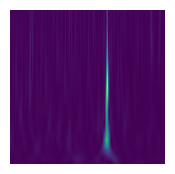

Start time: 1135119887.5625(s)
Stop time : 1135119896.0739746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines


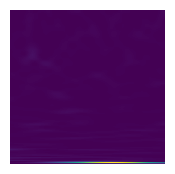

Start time: 1135542937.75(s)
Stop time : 1135542946.2614746(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst


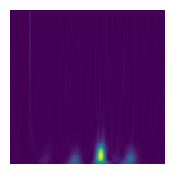

Start time: 1134162899.3125(s)
Stop time : 1134162907.8239746(s)
Duration: 8.511474609375(s)
Scattered_Light


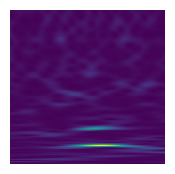

Start time: 1131952246.89453(s)
Stop time : 1131952255.4060047(s)
Duration: 8.511474609375(s)
Tomte


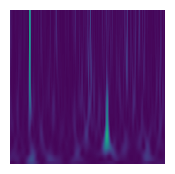

Start time: 1130018989.125(s)
Stop time : 1130018997.6364746(s)
Duration: 8.511474609375(s)
No_Glitch


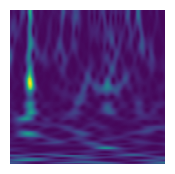

In [21]:
#fout=h5.File(path+outfile,'r')
#dataset=fout['Low_Frequency_Lines']
#t = TimeSeries(dataset[()])
outdir='/content/content/sample_data/Gravity_Spy/'
i=0
t_last=5

for outfile in os.listdir(outdir):
  fout=h5.File(outdir+outfile,'r')
  type_of_glitch=list(fout.keys())[0]
  dataset=fout[type_of_glitch]
  t = TimeSeries(dataset[()])
  t_delta=1.0
  # get signal time interval
  t_start=dataset.attrs['t0']
  dt=1.0 / dataset.attrs['sample_rate']
  t.t0 = t_start
  t.dt = dt
  t_stop=t.times[-1].value
  print('Start time: '+str(t_start)+'(s)')
  print('Stop time : '+str(t_stop)+'(s)')
  print('Duration: '+str(t_stop-t_start)+'(s)')
       
  # q-transform around center and below 100 Hz
  t_center=(t_stop-t_start)/2+t_start
  hq = t.q_transform(outseg=(t_center-t_delta,t_center+t_delta),frange=(10, 100))
           
  plot=qplot(hq,t_center,t_delta)
           
  fout.close()
  print(type_of_glitch)
  plt.show()
  if i==t_last:
    break
  i+=1